In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
#
gdf_warnings = gpd.read_file('/content/geo_warnings.geojson')
df_temperature = pd.read_excel('/content/avg_temp_countries.xlsx')

In [3]:
gdf_warnings.head(20)


,id,name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code,geometry
0,AFG,Afghanistan,NaN,NaN,no,NaN,NaN,NaN,Afghanistan,AFG,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,No,NaN,no,NaN,NaN,NaN,Angola,AGO,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,No,NaN,no,NaN,NaN,NaN,United Arab Emirates,ARE,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,Yes,NaN,yes,1.0,4.0,100.0,Argentina,ARG,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
5,ARM,Armenia,Yes,NaN,no,NaN,NaN,NaN,Armenia,ARM,"POLYGON ((43.58275 41.09214, 44.97248 41.24813..."
6,ATA,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-59.57209 -80.04018, -59.86585..."
7,ATF,French Southern and Antarctic Lands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
8,AUS,Australia,No,NaN,yes,7.0,1.0,509.0,Australia,AUS,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412..."
9,AUT,Austria,Yes,NaN,yes,3.0,1.0,350.0,Austria,AUT,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."


In [4]:
gdf_warnings['id'].isna().sum()
#id - is a more complete list with country codes so merge on it

0

<Axes: >

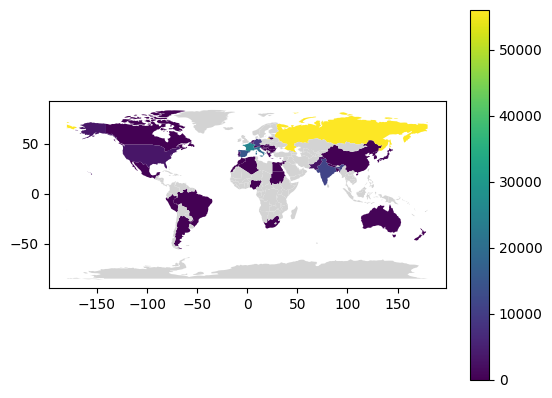

In [5]:
gdf_warnings.plot('number of deaths', legend = True, missing_kwds={'color': 'lightgrey'})

In [6]:
total_events = gdf_warnings['number of events'].sum()
print(total_events)

185.0


In [7]:
gdf_warnings[~gdf_warnings['number of events'].isna()].head(20)

,id,name,Heatwaves Warning Systems (WMO data),Heatwaves Warning Systems other sources,heatwaves causing deaths,number of events,nth cause of deaths,number of deaths,country_name,country_code,geometry
2,ALB,Albania,NaN,NaN,yes,2.0,8.0,3.0,Albania,ALB,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
4,ARG,Argentina,Yes,NaN,yes,1.0,4.0,100.0,Argentina,ARG,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
8,AUS,Australia,No,NaN,yes,7.0,1.0,509.0,Australia,AUS,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412..."
9,AUT,Austria,Yes,NaN,yes,3.0,1.0,350.0,Austria,AUT,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
12,BEL,Belgium,Yes,NaN,yes,7.0,1.0,3241.0,Belgium,BEL,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."
15,BGD,Bangladesh,NaN,NaN,yes,2.0,15.0,62.0,Bangladesh,BGD,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
16,BGR,Bulgaria,Yes,NaN,yes,2.0,5.0,9.0,Bulgaria,BGR,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."
18,BIH,Bosnia and Herzegovina,Yes,NaN,yes,1.0,NaN,0.0,Bosnia and Herzegovina,BIH,"POLYGON ((19.00549 44.86023, 19.36803 44.86300..."
23,BRA,Brazil,Yes,NaN,yes,2.0,8.0,88.0,Brazil,BRA,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
28,CAN,Canada,Yes,NaN,yes,1.0,2.0,70.0,Canada,CAN,"MULTIPOLYGON (((-63.66450 46.55001, -62.93930 ..."


<Axes: >

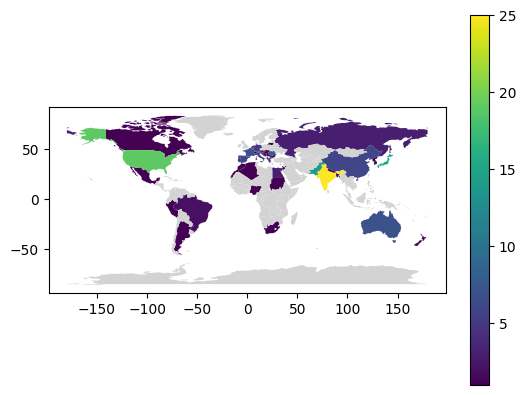

In [8]:
gdf_warnings.plot('number of events', legend = True, missing_kwds={'color': 'lightgrey'})

<Axes: >

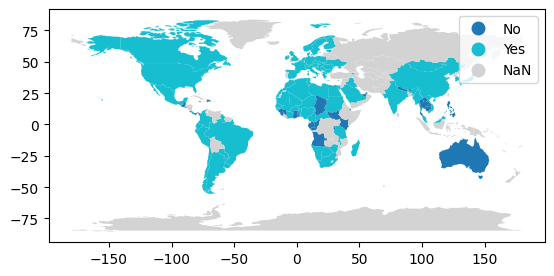

In [9]:
gdf_warnings.plot('Heatwaves Warning Systems (WMO data)', legend = True, missing_kwds={'color': 'lightgrey'})

In [10]:
gdf_warnings.groupby('Heatwaves Warning Systems (WMO data)', dropna=False)['name'].count()

Heatwaves Warning Systems (WMO data)
No     26
Yes    82
NaN    72
Name: name, dtype: int64

In [11]:
pop = pd.read_csv('/content/world_population.csv')

In [12]:
pop22 = pop[['CCA3','Continent','2022 Population', 'World Population Percentage']]

In [13]:
gdf_warnings = gdf_warnings[[ 'country_code','country_name', 'Heatwaves Warning Systems (WMO data)', 'number of events', 'number of deaths', 'geometry']]

In [14]:
pop_gdf = gdf_warnings.merge(pop22, how='left', left_on='country_code', right_on='CCA3')


In [15]:
warning_bypop =pop_gdf.groupby('Heatwaves Warning Systems (WMO data)', dropna=False)['2022 Population'].sum()

In [16]:
warning_bypop.head()

Heatwaves Warning Systems (WMO data)
No     5.367057e+08
Yes    5.619882e+09
NaN    1.757109e+09
Name: 2022 Population, dtype: float64

In [17]:
warning_bypop.index

Index(['No', 'Yes', nan], dtype='object', name='Heatwaves Warning Systems (WMO data)')

In [18]:


warning_bypop = pd.DataFrame(warning_bypop)
warning_bypop.head()

,2022 Population
Heatwaves Warning Systems (WMO data),
No,5.367057e+08
Yes,5.619882e+09
NaN,1.757109e+09


In [19]:
warning_bypop.sort_values(by= '2022 Population', inplace=True)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

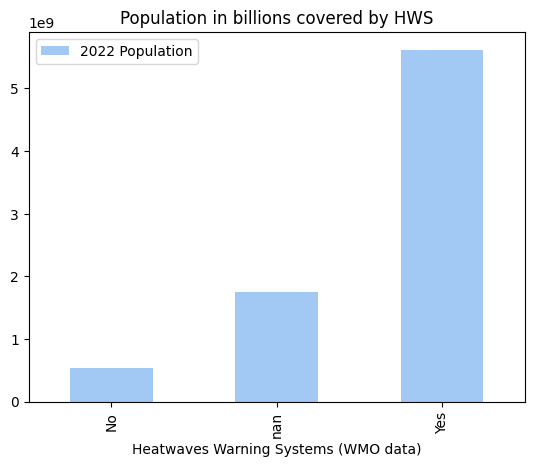

In [26]:
colors = sns.color_palette('pastel')
warning_bypop.plot.bar(color=colors)
plt.title('Population in billions covered by HWS')
plt.show()